In [2]:
from my_methods import *

In [3]:
Eint_mul = json_load('1-PCC_Values/ExE_interactions_mul.json')
Nint_mul = json_load('1-PCC_Values/NxN_interactions_mul.json')
GLOBALint_mul = json_load('1-PCC_Values/global_interaction_mul.json')

In [6]:
Eint_add = json_load('1-PCC_Values/ExE_interactions_add.json')
Nint_add = json_load('1-PCC_Values/NxN_interactions_add.json')
GLOBALint_add = json_load('1-PCC_Values/global_interaction_add.json')

In [4]:
filt_value = 0.3
networks_mul = (Eint_mul, Nint_mul, GLOBALint_mul)
networks_add = (Eint_add, Nint_add, GLOBALint_add)
#############################################
networks_mul = list(map(lambda x: select_interactions(x, filt_value), networks_mul))
networks_add = list(map(lambda x: select_interactions(x, filt_value), networks_add))
#############################################
Eint_mul, Nint_mul, GLOBALint_mul = networks_mul
Eint_add, Nint_add, GLOBALint_add = networks_add

NameError: name 'Eint_mul' is not defined

### Voy a extraer de cada red el 5% más conectado

In [10]:
percentage = 5

In [11]:
#Eint_mul_hubs = find_hubs(Eint_mul, int(len(Eint_mul)*percentage/100))
#Nint_mul_hubs = find_hubs(Nint_mul, int(len(Nint_mul)*percentage/100))
GLOBALint_mul_hubs = find_hubs(GLOBALint_mul, int(len(GLOBALint_mul)*percentage/100))

In [12]:
#Eint_add_hubs = find_hubs(Eint_add, int(len(Eint_add)*percentage/100))
#Nint_add_hubs = find_hubs(Nint_add, int(len(Nint_add)*percentage/100))
GLOBALint_add_hubs = find_hubs(GLOBALint_add, int(len(GLOBALint_add)*percentage/100))

In [13]:
set(Eint_mul_hubs) == set(Eint_add_hubs), set(Nint_mul_hubs) == set(Nint_add_hubs), set(GLOBALint_mul_hubs) == set(GLOBALint_add_hubs)
# Cada modelo predice diferentes hubs

NameError: name 'Eint_mul_hubs' is not defined

In [19]:
len(set(GLOBALint_mul_hubs)), len(set(GLOBALint_add_hubs))

(233, 240)

In [52]:
os.mkdir('hubs_enrichment')

mul_hubs = [Eint_mul_hubs, Nint_mul_hubs, GLOBALint_mul_hubs]
add_hubs = [Eint_add_hubs, Nint_add_hubs, GLOBALint_add_hubs]
titles = ['ExE', 'NxN', 'GLOBAL']

for l in range(len(mul_hubs)):
    mul_hubs[l] = list(map(lambda x: x.upper(), mul_hubs[l]))
    os.mkdir(f'hubs_enrichment/{titles[l]}_mul_hubs')
    list_save(mul_hubs[l], f'hubs_enrichment/{titles[l]}_mul_hubs/{titles[l]}_mul_hubs.txt')
for l in range(len(add_hubs)):
    add_hubs[l] = list(map(lambda x: x.upper(), add_hubs[l]))
    os.mkdir(f'hubs_enrichment/{titles[l]}_add_hubs')
    list_save(add_hubs[l], f'hubs_enrichment/{titles[l]}_add_hubs/{titles[l]}_add_hubs.txt')

In [53]:
!./enrichment.sh hubs_enrichment

tail: error writing 'standard output': Broken pipe
tail: error writing 'standard output': Broken pipe
tail: error writing 'standard output': Broken pipe


tail: error writing 'standard output': Broken pipe
tail: error writing 'standard output': Broken pipe


tail: error writing 'standard output': Broken pipe


In [ ]:
def check_essentiality(net, percentage):
    hubs = most_connected_alleles(net, int(len(net)*percentage/100))
    essentiality = [is_essential(i) for i in hubs]
    return sum(essentiality)/len(essentiality)

check_essentiality(GLOBALint_mul, percentage=5), check_essentiality(GLOBALint_add, percentage=5)

(0.51931330472103, 0.44583333333333336)


### Voy a procesar los dataframes con los enriquecimientos

In [2]:
def process_dataframe(df):
    df['ratio_in_study'] = list(map(lambda x: int(x.split('/')[0])/int(x.split('/')[1]), df['ratio_in_study']))
    df['name'] = df['name'].apply(lambda x: x.rstrip())
    return df

In [3]:
def ontology(df, title='No Title', save=False, path='default.png'):
    plt.style.use('ggplot')
    plt.figure(figsize=(10,8))
    if len(df)>25:
        df.sort_values('p_fdr_bh', inplace=True)
        df = df[:25]
    w = plt.scatter(df['ratio_in_study'], df['name'], s=list(map(lambda x: x*10, df['study_count'])), c=df['p_fdr_bh'], cmap='cool_r', edgecolors="black")
    a = plt.xticks(np.arange(0,1.1,0.1))
    plt.xlabel('Razon de genes en estudio', fontsize=15)
    plt.ylabel('Terminos GO', fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(title, fontsize=18)
    clb = plt.colorbar()
    plt.clim(0, 0.05)
    clb.set_label('p-valor', fontsize=15)
    if save:
        plt.savefig(path, bbox_inches='tight')

/tmp/ipykernel_3329/115021480.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  clb = plt.colorbar()


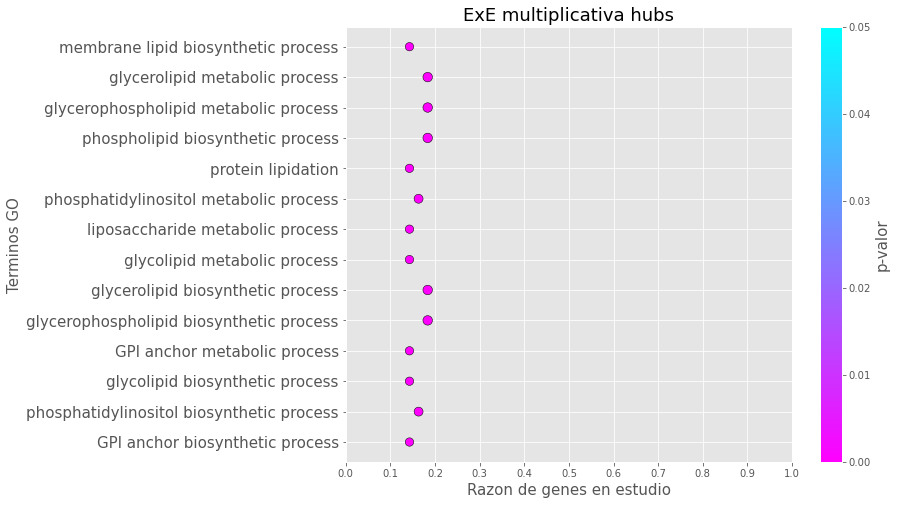

In [13]:
E_mul = pd.read_table('hubs_enrichment/ExE_mul_hubs/results_parsed/ExE_mul_hubs.txt_result.txt_parsed.txt')
E_mul = process_dataframe(E_mul)
ontology(E_mul, title='ExE multiplicativa hubs', save='True', path='img/ExE multiplicativa hubs.png')

/tmp/ipykernel_3049/115021480.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  clb = plt.colorbar()


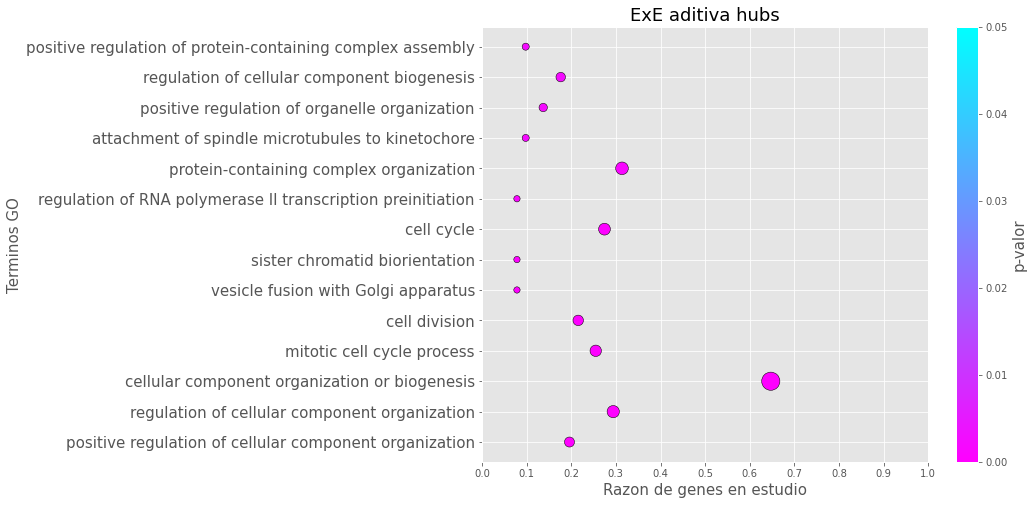

In [6]:
E_add = pd.read_table('hubs_enrichment/ExE_add_hubs/results_parsed/ExE_add_hubs.txt_result.txt_parsed.txt')
E_add = process_dataframe(E_add)
E_add.loc[8, 'name'] = 'regulation of RNA polymerase II transcription preinitiation'
ontology(E_add, title='ExE aditiva hubs', save='True', path='img/ExE aditiva hubs.png')

/tmp/ipykernel_3329/115021480.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  clb = plt.colorbar()


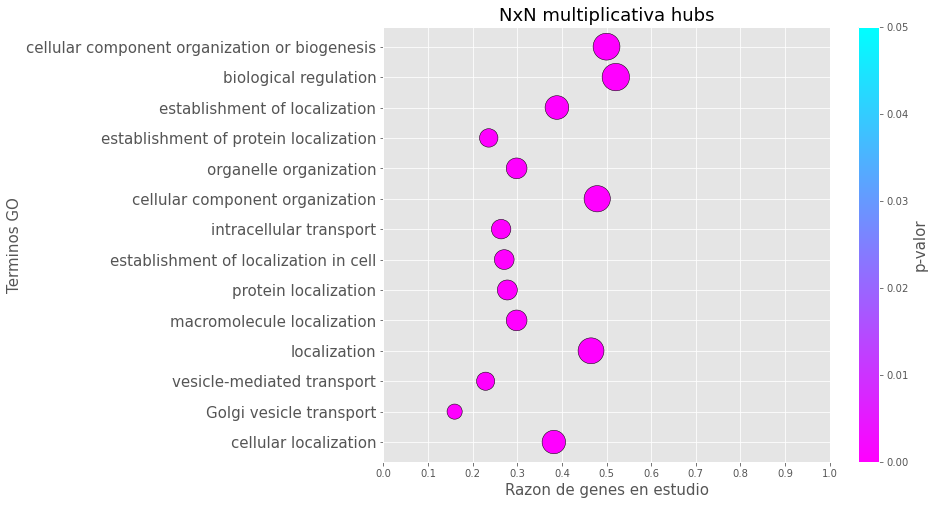

In [16]:
N_mul = pd.read_table('hubs_enrichment/NxN_mul_hubs/results_parsed/NxN_mul_hubs.txt_result.txt_parsed.txt')
N_mul = process_dataframe(N_mul)
ontology(N_mul, title='NxN multiplicativa hubs', save='True', path='img/NxN multiplicativa hubs.png')

/tmp/ipykernel_3329/115021480.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  clb = plt.colorbar()


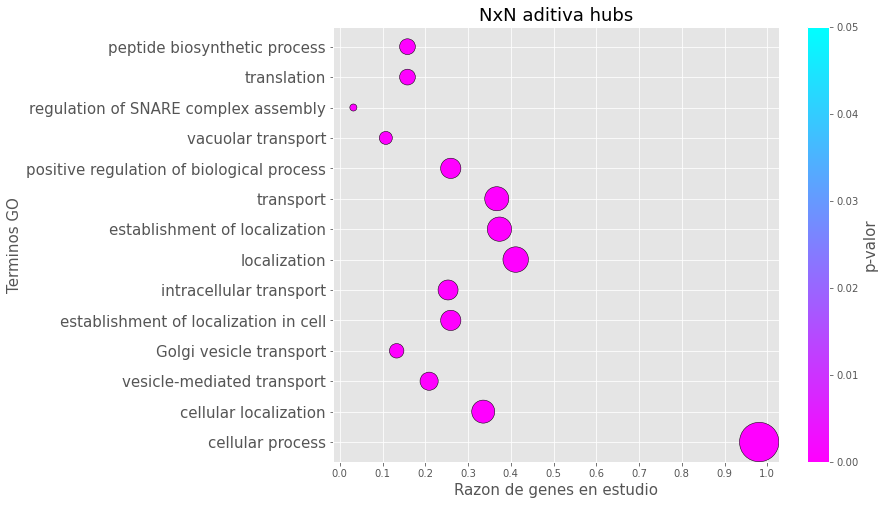

In [17]:
N_add = pd.read_table('hubs_enrichment/NxN_add_hubs/results_parsed/NxN_add_hubs.txt_result.txt_parsed.txt')
N_add = process_dataframe(N_add)
ontology(N_add, title='NxN aditiva hubs', save='True', path='img/NxN aditiva hubs.png')

/tmp/ipykernel_3377/115021480.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  clb = plt.colorbar()


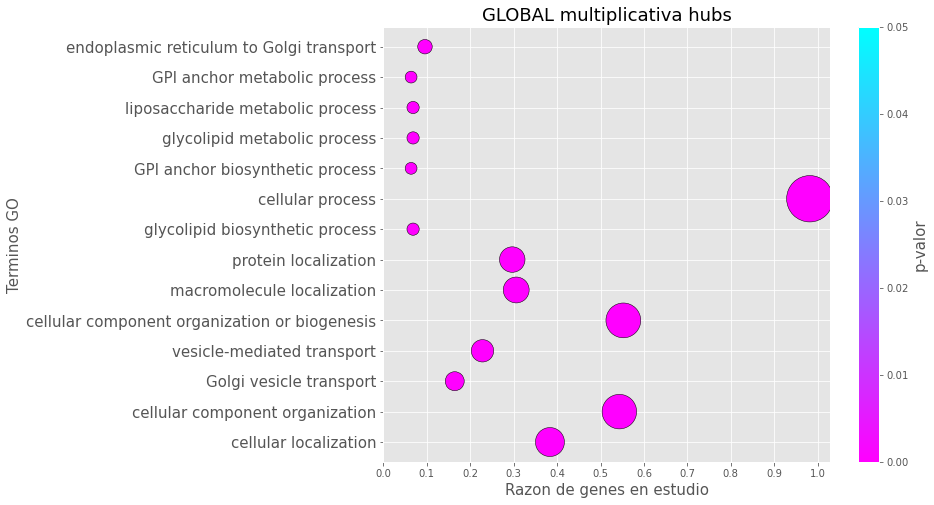

In [8]:
global_mul = pd.read_table('hubs_enrichment/GLOBAL_mul_hubs/results_parsed/GLOBAL_mul_hubs.txt_result.txt_parsed.txt')
global_mul = process_dataframe(global_mul)
global_mul.loc[13, 'name'] = 'endoplasmic reticulum to Golgi transport'
ontology(global_mul, title='GLOBAL multiplicativa hubs', save='True', path='img/global multiplicativa hubs.png')

/tmp/ipykernel_3329/115021480.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  clb = plt.colorbar()


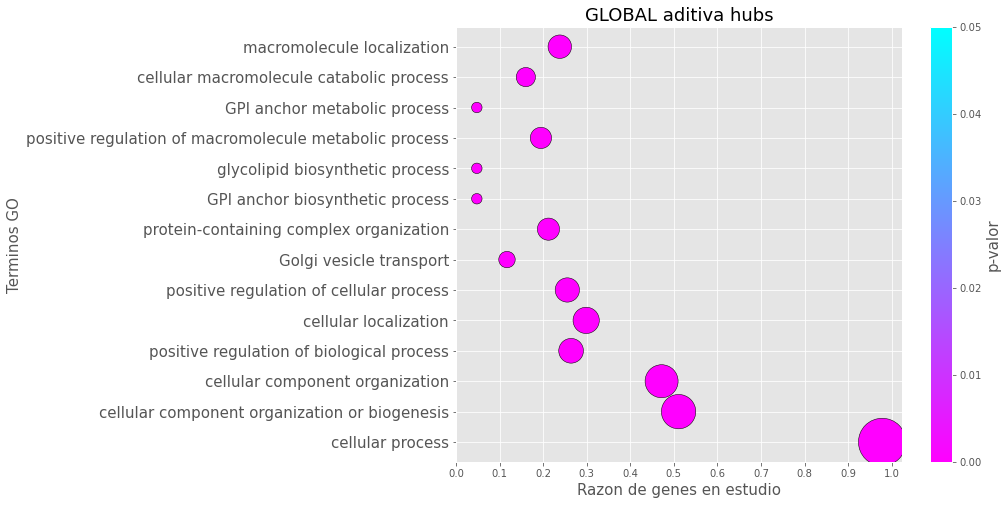

In [19]:
global_add = pd.read_table('hubs_enrichment/GLOBAL_add_hubs/results_parsed/GLOBAL_add_hubs.txt_result.txt_parsed.txt')
global_add = process_dataframe(global_add)
ontology(global_add, title='GLOBAL aditiva hubs', save='True', path='img/global aditiva hubs.png')